In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

ModuleNotFoundError: No module named 'numpy'

In [ ]:
df=pd.read_csv('/kaggle/input/network-anomaly-detection-dataset/all_data (3).csv')

In [ ]:
# Data exploration
df.shape

(4998, 35)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ifInOctets11         4998 non-null   int64 
 1   ifOutOctets11        4998 non-null   int64 
 2   ifoutDiscards11      4998 non-null   int64 
 3   ifInUcastPkts11      4998 non-null   int64 
 4   ifInNUcastPkts11     4998 non-null   int64 
 5   ifInDiscards11       4998 non-null   int64 
 6   ifOutUcastPkts11     4998 non-null   int64 
 7   ifOutNUcastPkts11    4998 non-null   int64 
 8   tcpOutRsts           4998 non-null   int64 
 9   tcpInSegs            4998 non-null   int64 
 10  tcpOutSegs           4998 non-null   int64 
 11  tcpPassiveOpens      4998 non-null   int64 
 12  tcpRetransSegs       4998 non-null   int64 
 13  tcpCurrEstab         4998 non-null   int64 
 14  tcpEstabResets       4998 non-null   int64 
 15  tcp?ActiveOpens      4998 non-null   int64 
 16  udpInD

In [ ]:
df.isnull().sum()

ifInOctets11           0
ifOutOctets11          0
ifoutDiscards11        0
ifInUcastPkts11        0
ifInNUcastPkts11       0
ifInDiscards11         0
ifOutUcastPkts11       0
ifOutNUcastPkts11      0
tcpOutRsts             0
tcpInSegs              0
tcpOutSegs             0
tcpPassiveOpens        0
tcpRetransSegs         0
tcpCurrEstab           0
tcpEstabResets         0
tcp?ActiveOpens        0
udpInDatagrams         0
udpOutDatagrams        0
udpInErrors            0
udpNoPorts             0
ipInReceives           0
ipInDelivers           0
ipOutRequests          0
ipOutDiscards          0
ipInDiscards           0
ipForwDatagrams        0
ipOutNoRoutes          0
ipInAddrErrors         0
icmpInMsgs             0
icmpInDestUnreachs     0
icmpOutMsgs            0
icmpOutDestUnreachs    0
icmpInEchos            0
icmpOutEchoReps        0
class                  0
dtype: int64

In [ ]:
df.describe()

,ifInOctets11,ifOutOctets11,ifoutDiscards11,ifInUcastPkts11,ifInNUcastPkts11,ifInDiscards11,ifOutUcastPkts11,ifOutNUcastPkts11,tcpOutRsts,tcpInSegs,...,ipInDiscards,ipForwDatagrams,ipOutNoRoutes,ipInAddrErrors,icmpInMsgs,icmpInDestUnreachs,icmpOutMsgs,icmpOutDestUnreachs,icmpInEchos,icmpOutEchoReps
count,4.998000e+03,4.998000e+03,4998.000000,4.998000e+03,4998.000000,4998.000000,4.998000e+03,4998.000000,4998.000000,4998.000000,...,4998.000000,4.998000e+03,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,2.161260e+09,1.281552e+09,36377.437975,9.150696e+07,20425.803922,36377.561825,2.680787e+07,4967.060624,2.393557,804.509004,...,31.603241,1.183485e+08,4.448980,34.515606,50.362345,27.724490,34.803922,12.165866,22.638055,22.638055
std,1.233852e+09,1.153395e+09,74228.977904,5.800683e+07,7936.895813,74228.989718,2.328438e+07,1784.778092,1.086869,570.224711,...,12.208877,8.013439e+07,3.030579,24.954240,37.036257,18.863781,20.826411,9.237202,18.481888,18.481888
min,1.426588e+06,1.618430e+05,0.000000,7.013690e+05,2735.000000,0.000000,2.230760e+05,796.000000,1.000000,55.000000,...,9.000000,9.874700e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.094045e+09,3.724623e+08,0.000000,5.020809e+07,15081.000000,0.000000,8.049108e+06,3799.250000,2.000000,195.000000,...,23.000000,5.991003e+07,0.000000,6.000000,12.000000,11.000000,13.000000,1.000000,1.000000,1.000000
50%,2.180395e+09,8.935678e+08,0.000000,7.906267e+07,20987.000000,0.000000,1.745086e+07,5089.000000,2.000000,817.000000,...,37.000000,9.806338e+07,5.000000,42.000000,55.000000,29.000000,34.000000,12.000000,26.000000,26.000000
75%,3.221204e+09,2.448435e+09,4216.000000,1.313896e+08,26931.000000,4216.000000,4.038847e+07,6383.000000,4.000000,1286.000000,...,39.000000,1.774026e+08,7.000000,61.000000,83.750000,44.000000,49.000000,21.000000,38.000000,38.000000
max,4.294416e+09,4.294061e+09,196630.000000,2.439828e+08,35238.000000,196630.000000,9.369831e+07,8311.000000,4.000000,1945.000000,...,58.000000,3.376958e+08,7.000000,62.000000,127.000000,68.000000,85.000000,23.000000,64.000000,64.000000


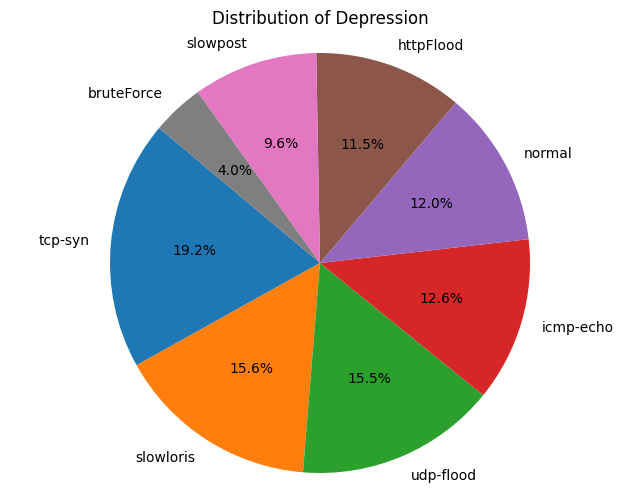

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Counting categories in 'depressed' column
depressed_count = df['class'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(depressed_count, labels=depressed_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Depression')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Encode the 'class' column
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

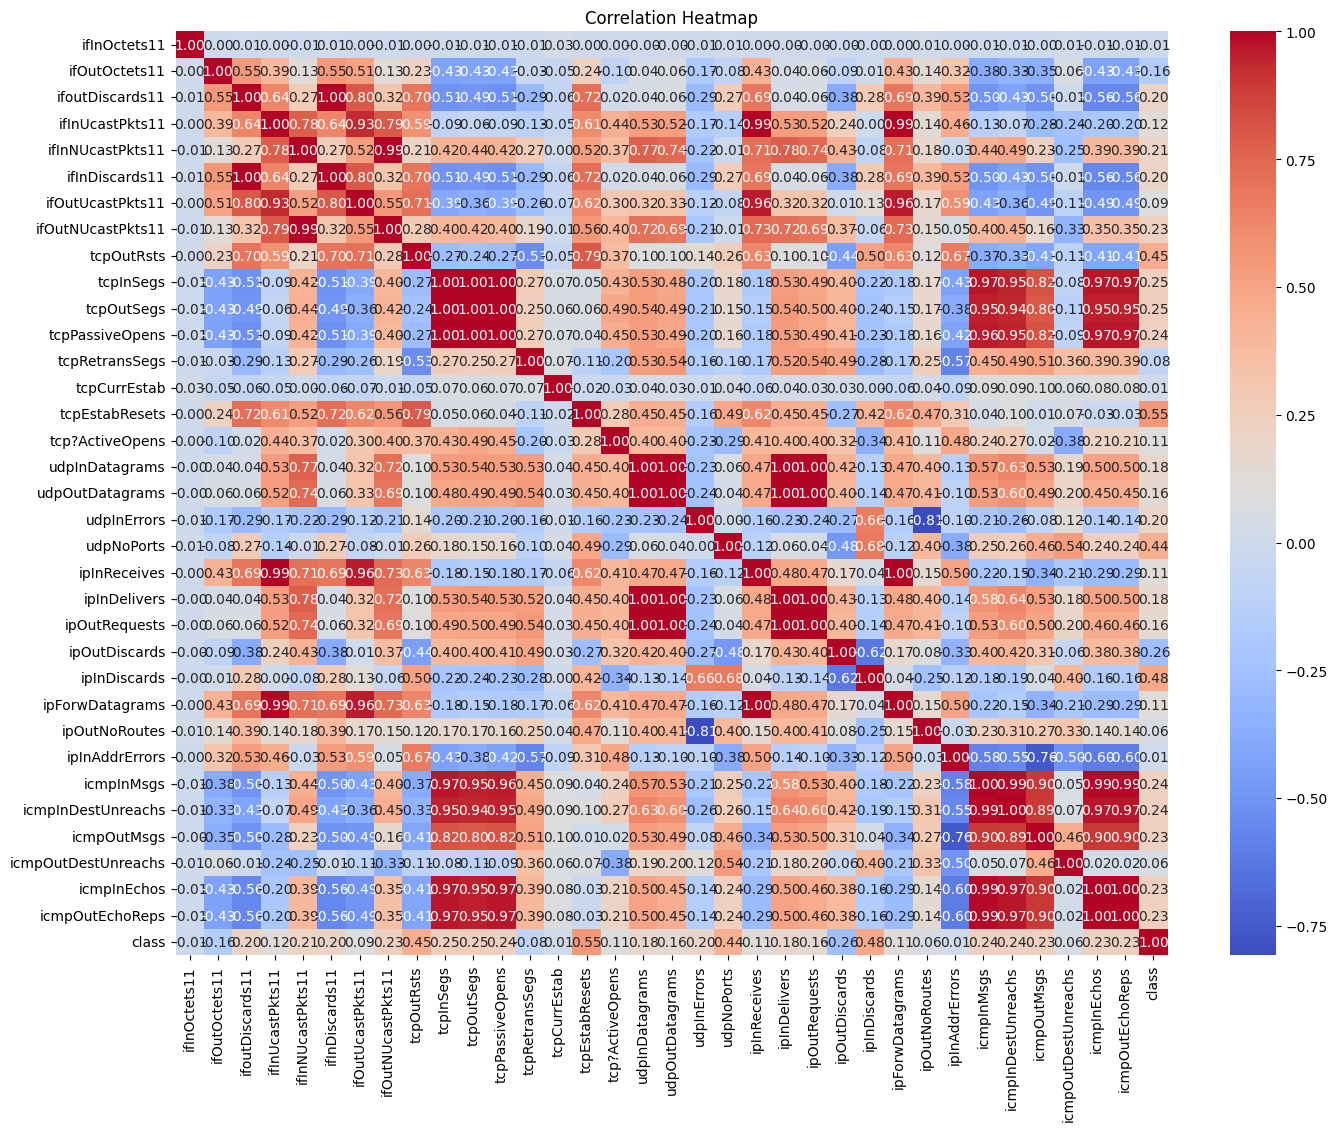

In [ ]:
# Calculating correlation matrix
correlation_matrix = df.corr()

# Plotting correlation heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

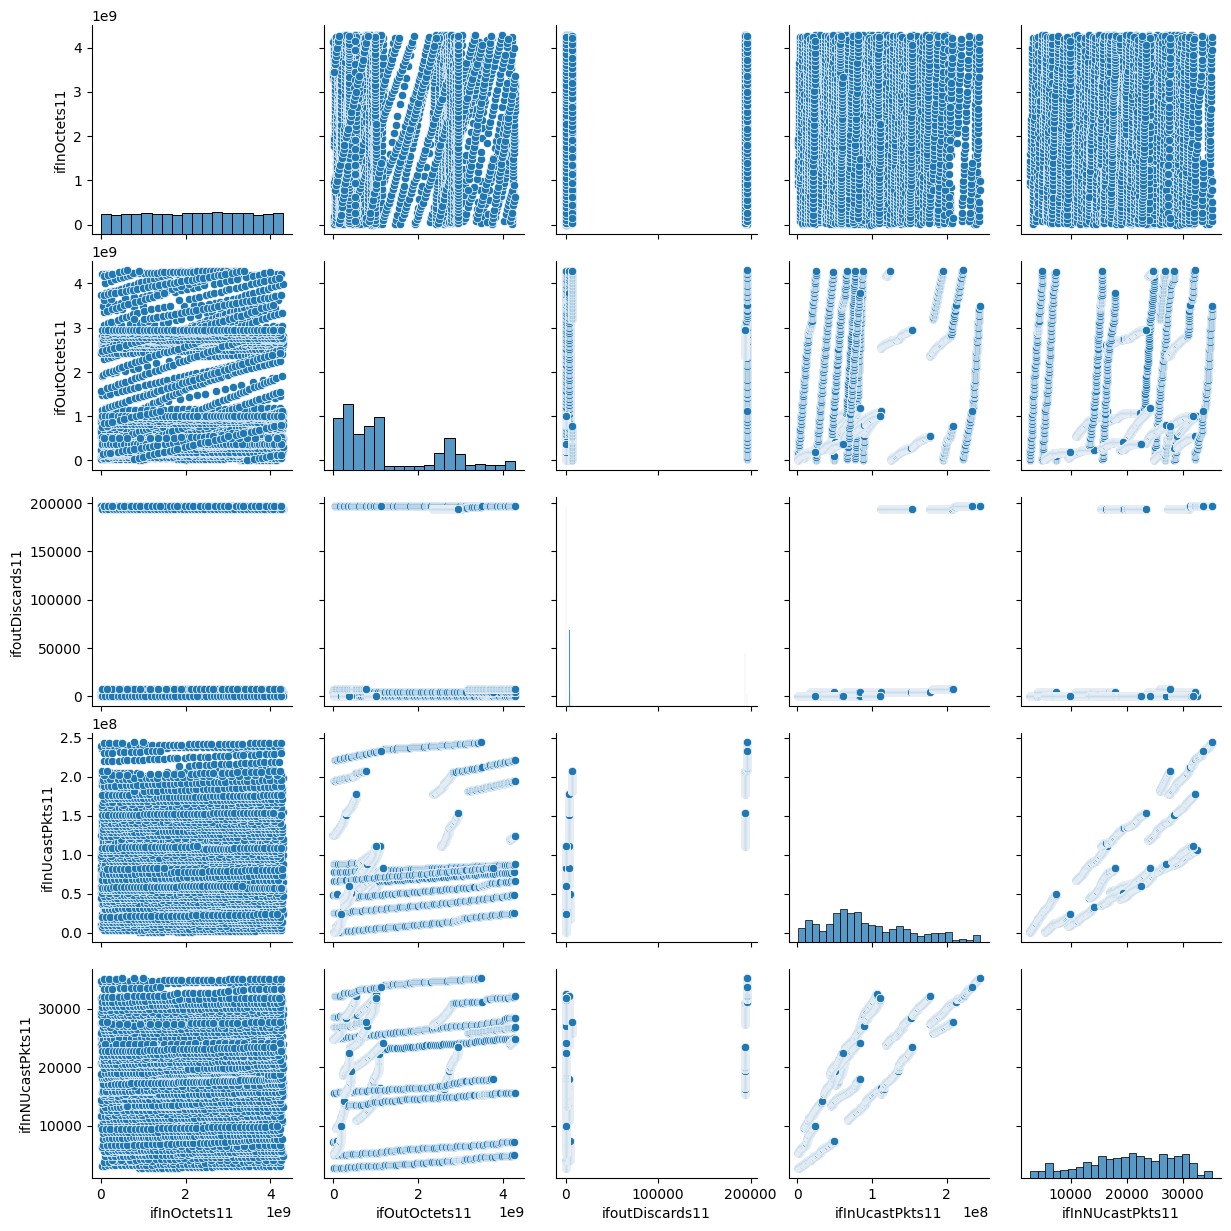

In [ ]:
# Pairplot for a subset of features
subset_features = df.columns[:5]  # Adjust the number of features for visualization
sns.pairplot(df[subset_features])
plt.show()